In [6]:
!pip install tensorflow-gpu

In [7]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils

(train_data, train_label) , (test_data, test_label) = tf.keras.datasets.mnist.load_data()
# print(train_label)
# print(test_data)
train_data, train_label = np.array(train_data), np.array(train_label)
test_data, test_label = np.array(test_data), np.array(test_label)
# print(train_data)
train_data784 = np.reshape(train_data, (60000, 784)) 
test_data784 = np.reshape(test_data, (10000, 784))

train_label = np_utils.to_categorical(train_label) 
test_label = np_utils.to_categorical(test_label)

scaler = StandardScaler()
scaler.fit(train_data784)

train_data784_normalized = scaler.transform(train_data784)
test_data784_normalized = scaler.transform(test_data784)
# print(train_data784_normalized[0])

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import SGD
from time import time
from keras.layers import Dense
from tensorflow.keras.regularizers import l2
acc_list_svm = []
acc_list_soft = []
num_components_list = [i*25 for i in range(1, 16)]
for i in range(1, 16):
    pca = PCA(n_components=25*i) # map the data to 70 dimensions
    train_data_reduced = pca.fit_transform(train_data784_normalized)
    
    test_data_reduced = pca.transform(test_data784_normalized)

    model_svm_regularized = Sequential([
        Dense(512, input_shape=(25*i,), activation='relu'),
        # GaussianNoise(0.1), not good
        Dense(512, activation='relu'),
        Dense(10, kernel_regularizer=l2(1e-4),activation='linear')
    ])

    model_soft_regularized = Sequential([
        Dense(512, input_shape=(25*i,), activation='relu'),
        # GaussianNoise(0.1), not good
        Dense(512, activation='relu'),
        Dense(10, kernel_regularizer=l2(1e-4),activation='softmax')
    ])

    optimizer = SGD(lr=0.1, momentum=0.9, decay=1.0/(300*100), nesterov=False)
    model_svm_regularized.compile(loss='categorical_hinge', optimizer=optimizer, metrics=['categorical_accuracy'])
    model_svm_regularized.fit(train_data_reduced, train_label, epochs=100, batch_size=300, validation_split=0.15, verbose=1)
    acc = model_svm_regularized.evaluate(test_data_reduced, test_label)[1]
    acc_list_svm.append(acc)
    model_soft_regularized.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    model_soft_regularized.fit(train_data_reduced, train_label, epochs=100, batch_size=300, validation_split=0.15, verbose=1)
    acc_list_soft.append(model_soft_regularized.evaluate(test_data_reduced, test_label)[1])

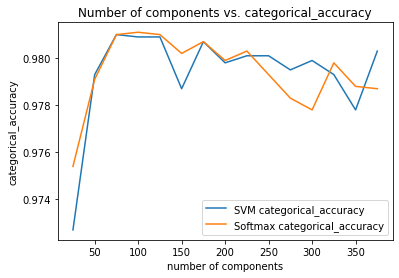

In [10]:
plt.plot(num_components_list, acc_list_svm)
plt.plot(num_components_list, acc_list_soft)
plt.title('Number of components vs. categorical_accuracy')
plt.xlabel("number of components")
plt.ylabel("categorical_accuracy")
plt.legend(["SVM categorical_accuracy", 'Softmax categorical_accuracy'])
plt.show()

In [12]:
print(acc_list_svm)
print(acc_list_soft)

[0.9726999998092651, 0.9793000221252441, 0.9810000061988831, 0.98089998960495, 0.98089998960495, 0.9786999821662903, 0.9807000160217285, 0.9797999858856201, 0.9800999760627747, 0.9800999760627747, 0.9794999957084656, 0.9799000024795532, 0.9793000221252441, 0.9778000116348267, 0.9803000092506409]
[0.9753999710083008, 0.9790999889373779, 0.9810000061988831, 0.9811000227928162, 0.9810000061988831, 0.9801999926567078, 0.9807000160217285, 0.9799000024795532, 0.9803000092506409, 0.9793000221252441, 0.9782999753952026, 0.9778000116348267, 0.9797999858856201, 0.9787999987602234, 0.9786999821662903]
